# Lezione 5

## Dario Pullia

### Esercizio 05.1

Spiega

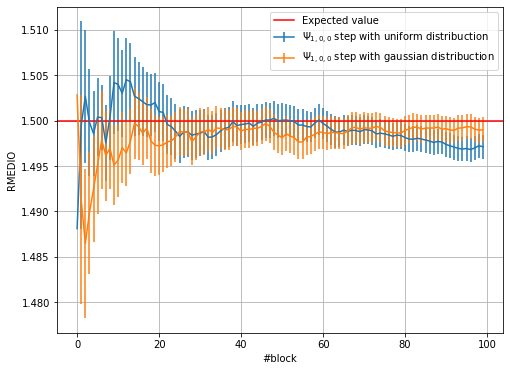

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

def AutoC(t, vec):
    appo1=0
    appo2=0
    appo3=0
    appo4=0
    appo5=0
    tmax=0
    tmax=vec.size
    for i in range(tmax-t):
        appo1+=vec[i]*vec[i+t]
        appo2+=vec[i]
        appo3+=vec[i+t]
    for i in range(tmax):
        appo4+=vec[i]*vec[i]
        appo5+=vec[i]
        
    return (appo1/(tmax-t) - appo2*appo3/((tmax-t)*(tmax-t)))/((appo4/tmax)-(appo5/tmax)**2)    






N=100
unif100, Errorunif100,gauss100, Errorgauss100,unif210, Errorunif210,gauss210, Errorgauss210,  = np.loadtxt("data01/data01.dat", usecols=(0,1,2,3,4,5,6,7), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,unif100, yerr=Errorunif100, label="$\Psi_{1,0,0}$ step with uniform distribuction")
plt.errorbar(x,gauss100, yerr=Errorgauss100,label="$\Psi_{1,0,0}$ step with gaussian distribuction")

plt.xlabel('#block')
plt.ylabel('RMEDIO')
plt.axhline(y = 3/2, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()



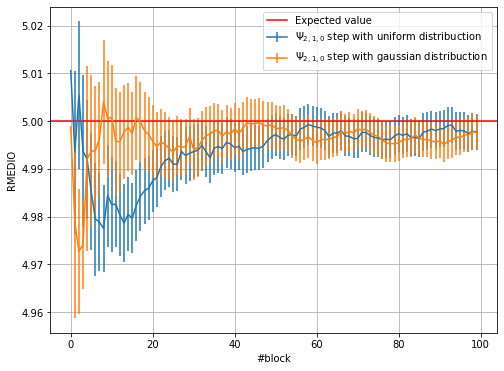

In [38]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,unif210, yerr=Errorunif210, label="$\Psi_{2,1,0}$ step with uniform distribuction")
plt.errorbar(x,gauss210, yerr=Errorgauss210,label="$\Psi_{2,1,0}$ step with gaussian distribuction")

plt.xlabel('#block')
plt.ylabel('RMEDIO')
plt.axhline(y = 5, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()


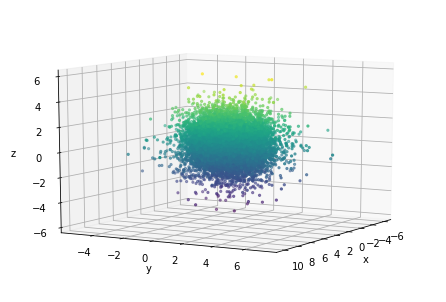

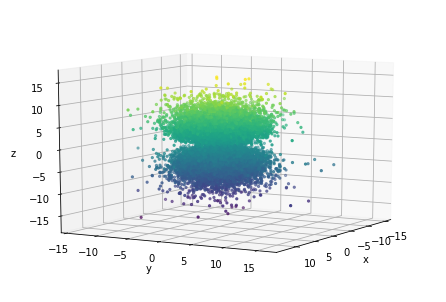

In [39]:
X,Y,Z= np.loadtxt("data01/data01_3d.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()
X,Y,Z= np.loadtxt("data01/data01_3d.dat", usecols=(3,4,5), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

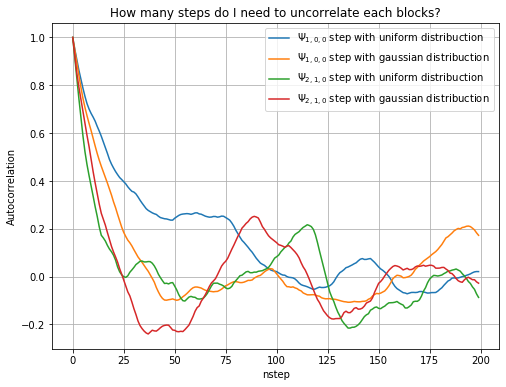

In [44]:
x = np.arange(200) 


Pos100U, Pos100G, Pos210U, Pos210G  = np.loadtxt("data01/data01_AutoC.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
fig=plt.figure(figsize=(8, 6))

U100=[]
G100=[]
U210=[]
G210=[]

for i in range(200):
    
    U100.append(AutoC(i, Pos100U))
    G100.append(AutoC(i, Pos100G))
    U210.append(AutoC(i, Pos210U))
    G210.append(AutoC(i, Pos210G))



plt.plot(x,U100, label="$\Psi_{1,0,0}$ step with uniform distribuction")
plt.plot(x,G100,label="$\Psi_{1,0,0}$ step with gaussian distribuction")
plt.plot(x,U210, label="$\Psi_{2,1,0}$ step with uniform distribuction")
plt.plot(x,G210, label="$\Psi_{2,1,0}$ step with gaussian distribuction")

plt.xlabel('nstep')
plt.ylabel('Autocorrelation')
plt.title('How many steps do I need to uncorrelate each blocks?')
plt.grid(True)
plt.legend()
plt.show()


